# Лабораторная работа №3

ФИО: Егоров Вадим Евгеньевич   
Группа: БИВТ-21-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`)
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных

In [1]:
import numpy as np
import pandas as pd

In [2]:
path_to_dataset = './Admission_Predict.csv'

In [3]:
data = pd.read_csv(path_to_dataset, sep=',')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Понимаем, какая перед нами задача

Задача регрессии.
Потому что целевая переменная варьируется в промежутке [0; 1]

In [7]:
Y = data['Chance of Admit ']
X = data.iloc[:, 1:8]

<Axes: >

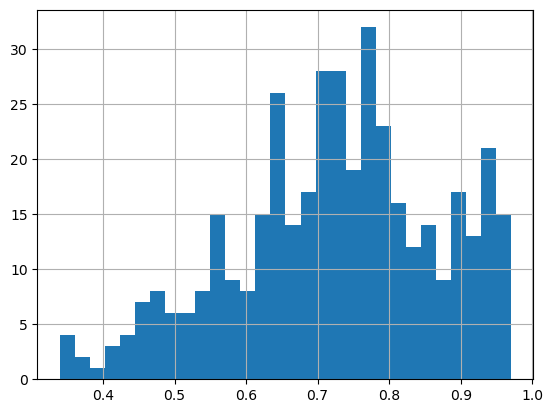

In [8]:
Y.hist(bins=30)

## 3. Делаем предобработку данных

Деление выборки на тренировочную и тестовую:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Проверка на пропуски:

In [10]:
pd.isna(data).sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Пропусков нет, значит датасет качественный

Нормировка численные переменные:

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.457111,0.424662,-0.057308,0.127156,-1.059652,0.139866,0.927613
1,0.102289,0.424662,-0.057308,0.617396,-0.501940,0.361100,-1.078036
2,2.053813,2.085930,1.689221,1.107637,1.171194,2.250095,0.927613
3,0.279700,-0.572099,-0.057308,-0.363084,-1.059652,-0.030313,0.927613
4,-0.163828,-1.236607,-1.803837,-1.343565,-1.059652,-1.085428,-1.078036
...,...,...,...,...,...,...,...
315,1.698990,0.756915,1.689221,1.597877,1.728905,1.994826,0.927613
316,1.078051,0.590789,0.815957,1.107637,1.171194,1.007783,0.927613
317,-0.962179,-0.405973,-0.930573,-0.853324,-0.501940,-0.625942,0.927613
318,-1.317002,-1.402734,-1.803837,-1.343565,-1.617363,-2.276686,-1.078036


In [12]:
X_train_final = X_train_scaled
X_test_final = X_test_scaled

## 4-5. Обучение моделей и их метрики

Линейная модель:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Обучение модели
lr = LinearRegression()
lr.fit(X_train_final, Y_train)

# Предсказание и оценка модели
Y_train_pred = lr.predict(X_train_final)
Y_test_pred = lr.predict(X_test_final)

# Метрики
train_mae_lr = mean_absolute_error(Y_train, Y_train_pred)
train_rmse_lr = mean_squared_error(Y_train, Y_train_pred, squared=False)
train_mape_lr = mean_absolute_percentage_error(Y_train, Y_train_pred)

test_mae_lr = mean_absolute_error(Y_test, Y_test_pred)
test_rmse_lr = mean_squared_error(Y_test, Y_test_pred, squared=False)
test_mape_lr = mean_absolute_percentage_error(Y_test, Y_test_pred)

print(lr.coef_)
print(lr.intercept_)


[ 0.02099652  0.01639522  0.00844812 -0.00029857  0.01413835  0.0673812
  0.01108222]
0.7252812500000001


In [14]:
print(f'Train MAE: {train_mae_lr}, Train RMSE: {train_rmse_lr}, Train MAPE: {train_mape_lr}')
print(f'Test MAE: {test_mae_lr}, Test RMSE: {test_rmse_lr}, Test MAPE: {test_mape_lr}')

Train MAE: 0.043887522473661886, Train RMSE: 0.062212714483595104, Train MAPE: 0.069983493197922
Test MAE: 0.04795673362091203, Test RMSE: 0.0679485347692282, Test MAPE: 0.08511848732401703


Деревянная модель:

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Обучение модели
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train_final, Y_train)

# Предсказание и оценка модели
Y_train_pred = tree.predict(X_train_final)
Y_test_pred = tree.predict(X_test_final)

# Метрики
train_mae_tree = mean_absolute_error(Y_train, Y_train_pred)
train_rmse_tree = mean_squared_error(Y_train, Y_train_pred, squared=False)
train_mape_tree = mean_absolute_percentage_error(Y_train, Y_train_pred)

test_mae_tree = mean_absolute_error(Y_test, Y_test_pred)
test_rmse_tree = mean_squared_error(Y_test, Y_test_pred, squared=False)
test_mape_tree = mean_absolute_percentage_error(Y_test, Y_test_pred)

In [16]:
print(f'Train MAE: {train_mae_tree}, Train RMSE: {train_rmse_tree}, Train MAPE: {train_mape_tree}')
print(f'Test MAE: {test_mae_tree}, Test RMSE: {test_rmse_tree}, Test MAPE: {test_mape_tree}')

Train MAE: 0.03836455592105263, Train RMSE: 0.053417440063714454, Train MAPE: 0.06051459119583824
Test MAE: 0.053098249767410934, Test RMSE: 0.07657657064044084, Test MAPE: 0.09222199638709996


К-ближайших соседей:

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# Обучение модели
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_final, Y_train)

# Предсказание и оценка модели
Y_train_pred = knn.predict(X_train_final)
Y_test_pred = knn.predict(X_test_final)

# Метрики
train_mae_knn = mean_absolute_error(Y_train, Y_train_pred)
train_rmse_knn = mean_squared_error(Y_train, Y_train_pred, squared=False)
train_mape_knn = mean_absolute_percentage_error(Y_train, Y_train_pred)

test_mae_knn = mean_absolute_error(Y_test, Y_test_pred)
test_rmse_knn = mean_squared_error(Y_test, Y_test_pred, squared=False)
test_mape_knn = mean_absolute_percentage_error(Y_test, Y_test_pred)


In [18]:
print(f'Train MAE: {train_mae_knn}, Train RMSE: {train_rmse_knn}, Train MAPE: {train_mape_knn}')
print(f'Test MAE: {test_mae_knn}, Test RMSE: {test_rmse_knn}, Test MAPE: {test_mape_knn}')

Train MAE: 0.040618749999999995, Train RMSE: 0.05652422047228957, Train MAPE: 0.0652328528902097
Test MAE: 0.05422499999999999, Test RMSE: 0.07937285430170694, Test MAPE: 0.09776720278510456


Случайный лес:

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Обучение модели
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_final, Y_train)

# Предсказание и оценка модели
Y_train_pred = rf.predict(X_train_final)
Y_test_pred = rf.predict(X_test_final)

# Метрики
train_mae_rf = mean_absolute_error(Y_train, Y_train_pred)
train_rmse_rf = mean_squared_error(Y_train, Y_train_pred, squared=False)
train_mape_rf = mean_absolute_percentage_error(Y_train, Y_train_pred)

test_mae_rf = mean_absolute_error(Y_test, Y_test_pred)
test_rmse_rf = mean_squared_error(Y_test, Y_test_pred, squared=False)
test_mape_rf = mean_absolute_percentage_error(Y_test, Y_test_pred)


In [20]:
print(f'Train MAE: {train_mae_rf}, Train RMSE: {train_rmse_rf}, Train MAPE: {train_mape_rf}')
print(f'Test MAE: {test_mae_rf}, Test RMSE: {test_rmse_rf}, Test MAPE: {test_mape_rf}')

Train MAE: 0.03528474416973796, Train RMSE: 0.047885209864870645, Train MAPE: 0.05570010701811884
Test MAE: 0.047632153353134137, Test RMSE: 0.06907357974448254, Test MAPE: 0.08411192300529027


## 6. Сравнение моделей и выводы

Сравнение по метрикам:

In [21]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest'],
    'Train MAE': [train_mae_lr, train_mae_tree, train_mae_knn, train_mae_rf],
    'Test MAE': [test_mae_lr, test_mae_tree, test_mae_knn, test_mae_rf],
    'Train RMSE': [train_rmse_lr, train_rmse_tree, train_rmse_knn, train_rmse_rf],
    'Test RMSE': [test_rmse_lr, test_rmse_tree, test_rmse_knn, test_rmse_rf],
    'Train MAPE': [train_mape_lr, train_mape_tree, train_mape_knn, train_mape_rf],
    'Test MAPE': [test_mape_lr, test_mape_tree, test_mape_knn, test_mape_rf]
}

results_df = pd.DataFrame(results)
results_df


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train MAPE,Test MAPE
0,Linear Regression,0.043888,0.047957,0.062213,0.067949,0.069983,0.085118
1,Decision Tree,0.038365,0.053098,0.053417,0.076577,0.060515,0.092222
2,K-Nearest Neighbors,0.040619,0.054225,0.056524,0.079373,0.065233,0.097767
3,Random Forest,0.035285,0.047632,0.047885,0.069074,0.055700,0.084112


1. Какая модель справилась лучше с поставленной задачей?

In [22]:
best_model = results_df.loc[results_df['Test MAE'].idxmin()]['Model']
print(f'Лучшей моделью является: {best_model}')

best_model = results_df.loc[results_df['Test RMSE'].idxmin()]['Model']
print(f'Лучшей моделью является: {best_model}')

best_model = results_df.loc[results_df['Test MAPE'].idxmin()]['Model']
print(f'Лучшей моделью является: {best_model}')

Лучшей моделью является: Random Forest
Лучшей моделью является: Linear Regression
Лучшей моделью является: Random Forest


Можно увидеть, что Random Forest имеет маленькие значения метрик. То есть он справился наиболее точным образом.

2. Имеет ли место переобучение?

In [23]:
results_df['MAE Difference'] = results_df['Train MAE'] - results_df['Test MAE']
results_df['RMSE Difference'] = results_df['Train RMSE'] - results_df['Test RMSE']
results_df['MAPE Difference'] = results_df['Train MAPE'] - results_df['Test MAPE']
print(results_df[['Model', 'MAE Difference', 'RMSE Difference', 'MAPE Difference']])


                 Model  MAE Difference  RMSE Difference  MAPE Difference
0    Linear Regression       -0.004069        -0.005736        -0.015135
1        Decision Tree       -0.014734        -0.023159        -0.031707
2  K-Nearest Neighbors       -0.013606        -0.022849        -0.032534
3        Random Forest       -0.012347        -0.021188        -0.028412


 Разница между тренировочными и тестовыми метриками маленькая, это указывает на отсутствие переобучения.

3. Имеет ли место недообучение?

Можно увидеть, что модель хорошо работает как на тренировочных, так и на тестовых данных. Поэтому недообучения не наблюдается.

4. Как можно улучшить метрики моделей?

Можно попробовать отрегулировать количество тренировочных данных (например, увеличение данных)   
Можно оптимизировать гиперпараметры некоторых моделей     
Можно попробовать более сложные модели